In [1]:
# Standard Libraries
import os 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# Specific Libraries
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing 
from sklearn import tree, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from io import StringIO  
from IPython.display import Image 

In [1]:
import os

print(os.getcwd())

C:\Users\AmanN\Data Science\MacroTrack


# Data Cleaning Following Upload 

In [3]:
Nutrition = pd.read_csv('Nutrition.csv')
Measurement = pd.read_csv('Measurement.csv')

In [4]:
Nutrition.head()

,Date,Meal,Time,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,...,Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2022-03-22,Breakfast,NaN,300.0,5.7,0.0,3.3,0.5,0.0,0.0,...,0.0,91.7,48.0,0.0,16.0,0.0,0.0,73.7,55.3,NaN
1,2022-03-22,Breakfast,4:15 PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2222.0,0.0,0.0,NaN
2,2022-03-22,Lunch,NaN,120.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,8.0,8.0,4.0,0.0,0.0,0.0,0.0,NaN
3,2022-03-22,Lunch,12:40 PM,300.0,18.0,5.0,0.0,0.0,0.0,160.0,...,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,4.0,NaN
4,2022-03-22,Lunch,4:20 PM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
del Nutrition['Time']
del Nutrition['Note']
del Nutrition['Meal']

In [6]:
Nutrition.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
0,2022-03-22,300.0,5.7,0.0,3.3,0.5,0.0,0.0,513.3,0.0,91.7,48.0,0.0,16.0,0.0,0.0,73.7,55.3
1,2022-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2222.0,0.0,0.0
2,2022-03-22,120.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,16.0,8.0,8.0,4.0,0.0,0.0,0.0,0.0
3,2022-03-22,300.0,18.0,5.0,0.0,0.0,0.0,160.0,180.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,4.0
4,2022-03-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
Nutrition = Nutrition.groupby('Date', as_index=False).sum()

In [8]:
Nutrition.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
0,2022-03-22,2190.0,112.7,31.8,6.4,3.4,0.0,1000.0,1246.8,2207.1,215.5,78.9,65.2,111.0,30.0,2296.1,113.3,113.6
1,2022-03-23,2412.5,120.6,30.5,3.4,0.5,0.0,902.0,2746.3,2339.3,255.2,79.7,47.7,105.0,0.0,2241.7,178.6,121.1
2,2022-03-24,2316.7,103.3,17.9,10.3,17.2,0.0,1005.0,1548.0,3689.9,260.5,93.7,94.1,134.0,123.6,2694.6,164.8,125.9
3,2022-03-25,1940.7,68.4,15.6,8.1,5.3,0.0,796.7,1732.3,3683.4,239.7,89.1,86.2,151.8,217.2,3060.1,159.8,122.8
4,2022-03-26,2377.4,78.4,15.0,5.1,1.2,0.0,426.7,1119.0,2426.0,296.2,60.0,55.8,151.1,193.6,2791.6,133.6,77.1


In [9]:
Exercise_Weight = pd.DataFrame({'Steps':[3988, 5790, 5656, 4353, 11281, 1210, 8910, 12281, 4326, 8367, 8353, 10240, 5607, 14829, 7781, 10557, 5480, 11994, 8930, 5571, 7453, 10090, 8905, 11355, 5623, 15498, 3874, 13789, 7074, 6548, 7248],'BMI':[24.4, 24.6, 23.9, 24, 23.9, 23.7, 23.9, 23.6, 23.8, 23.6, 24, 23.5, 24.1, 23.6, 23.7, 23.6, 23.7, 23.6, 23.3, 23.4, 23.5, 23.4, 23.2, 23.3, 23.2, 23.3, 23.3, 22.7, 22.9, 22.9, 22.9],'Weight':[171.36, 169.12, 167.2, 167.8, 166.6, 165.6, 166.6, 165.2, 166, 164.6, 167.8, 164.2, 168.43, 164.9, 165.6, 164.6, 165.4, 165, 162.6, 163, 163.6, 163.6, 162, 162.2, 162, 163, 162.4, 158, 160, 160.2, 160],'BodyFat':[13.5, 13.3, 12.8, 12.9,12.8, 12.5, 12.7, 12.3, 12.5, 12.2, 12.7, 12.1, 12.8, 12.2, 12.3, 12.4, 12.4, 12.2, 12.2, 12, 12.1, 11.9, 11.7, 11.9, 11.6, 11.8, 11.9, 11.1, 11.2, 11.2, 11.2]})

In [10]:
Exercise_Weight['Date1']=Nutrition['Date']
Exercise_Weight

,Steps,BMI,Weight,BodyFat,Date1
0,3988,24.4,171.36,13.5,2022-03-22
1,5790,24.6,169.12,13.3,2022-03-23
2,5656,23.9,167.20,12.8,2022-03-24
3,4353,24.0,167.80,12.9,2022-03-25
4,11281,23.9,166.60,12.8,2022-03-26
5,1210,23.7,165.60,12.5,2022-03-27
6,8910,23.9,166.60,12.7,2022-03-28
7,12281,23.6,165.20,12.3,2022-03-29
8,4326,23.8,166.00,12.5,2022-03-30
9,8367,23.6,164.60,12.2,2022-03-31


In [11]:
Nutrition_Exercise_Weight= pd.concat((Nutrition, Exercise_Weight), axis=1) 

In [12]:
Nutrition_Exercise_Weight.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Steps,BMI,Weight,BodyFat,Date1
0,2022-03-22,2190.0,112.7,31.8,6.4,3.4,0.0,1000.0,1246.8,2207.1,...,111.0,30.0,2296.1,113.3,113.6,3988,24.4,171.36,13.5,2022-03-22
1,2022-03-23,2412.5,120.6,30.5,3.4,0.5,0.0,902.0,2746.3,2339.3,...,105.0,0.0,2241.7,178.6,121.1,5790,24.6,169.12,13.3,2022-03-23
2,2022-03-24,2316.7,103.3,17.9,10.3,17.2,0.0,1005.0,1548.0,3689.9,...,134.0,123.6,2694.6,164.8,125.9,5656,23.9,167.20,12.8,2022-03-24
3,2022-03-25,1940.7,68.4,15.6,8.1,5.3,0.0,796.7,1732.3,3683.4,...,151.8,217.2,3060.1,159.8,122.8,4353,24.0,167.80,12.9,2022-03-25
4,2022-03-26,2377.4,78.4,15.0,5.1,1.2,0.0,426.7,1119.0,2426.0,...,151.1,193.6,2791.6,133.6,77.1,11281,23.9,166.60,12.8,2022-03-26


In [13]:
Nutrition_Exercise_Weight = Nutrition_Exercise_Weight.drop('Date1', axis = 1)

In [14]:
Nutrition_Exercise_Weight.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Steps,BMI,Weight,BodyFat
0,2022-03-22,2190.0,112.7,31.8,6.4,3.4,0.0,1000.0,1246.8,2207.1,...,65.2,111.0,30.0,2296.1,113.3,113.6,3988,24.4,171.36,13.5
1,2022-03-23,2412.5,120.6,30.5,3.4,0.5,0.0,902.0,2746.3,2339.3,...,47.7,105.0,0.0,2241.7,178.6,121.1,5790,24.6,169.12,13.3
2,2022-03-24,2316.7,103.3,17.9,10.3,17.2,0.0,1005.0,1548.0,3689.9,...,94.1,134.0,123.6,2694.6,164.8,125.9,5656,23.9,167.20,12.8
3,2022-03-25,1940.7,68.4,15.6,8.1,5.3,0.0,796.7,1732.3,3683.4,...,86.2,151.8,217.2,3060.1,159.8,122.8,4353,24.0,167.80,12.9
4,2022-03-26,2377.4,78.4,15.0,5.1,1.2,0.0,426.7,1119.0,2426.0,...,55.8,151.1,193.6,2791.6,133.6,77.1,11281,23.9,166.60,12.8


# Indexing Date

In [15]:
Nutrition_Exercise_Weight = Nutrition_Exercise_Weight.set_index('Date')

In [16]:
Nutrition_Exercise_Weight.head()

,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),...,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Steps,BMI,Weight,BodyFat
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-22,2190.0,112.7,31.8,6.4,3.4,0.0,1000.0,1246.8,2207.1,215.5,...,65.2,111.0,30.0,2296.1,113.3,113.6,3988,24.4,171.36,13.5
2022-03-23,2412.5,120.6,30.5,3.4,0.5,0.0,902.0,2746.3,2339.3,255.2,...,47.7,105.0,0.0,2241.7,178.6,121.1,5790,24.6,169.12,13.3
2022-03-24,2316.7,103.3,17.9,10.3,17.2,0.0,1005.0,1548.0,3689.9,260.5,...,94.1,134.0,123.6,2694.6,164.8,125.9,5656,23.9,167.20,12.8
2022-03-25,1940.7,68.4,15.6,8.1,5.3,0.0,796.7,1732.3,3683.4,239.7,...,86.2,151.8,217.2,3060.1,159.8,122.8,4353,24.0,167.80,12.9
2022-03-26,2377.4,78.4,15.0,5.1,1.2,0.0,426.7,1119.0,2426.0,296.2,...,55.8,151.1,193.6,2791.6,133.6,77.1,11281,23.9,166.60,12.8


In [17]:
Nutrition_Exercise_Weight.describe(include='all')

,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),...,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Steps,BMI,Weight,BodyFat
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2032.106452,76.003226,13.877419,10.451613,10.819355,0.051613,533.729032,1718.180645,2794.206452,258.616129,...,52.806452,126.951613,129.522581,1378.912903,155.170968,94.296774,8160.032258,23.564516,164.471290,12.206452
std,320.829700,18.799388,6.766324,4.259724,7.109262,0.187743,294.089334,641.407347,800.686618,52.379672,...,18.140984,18.379334,154.975671,1207.622215,63.702476,24.063077,3437.421587,0.430928,2.951685,0.593260
min,1483.500000,40.400000,5.000000,2.800000,0.400000,0.000000,75.000000,959.000000,566.400000,188.300000,...,14.200000,91.600000,0.000000,23.700000,48.500000,39.400000,1210.000000,22.700000,158.000000,11.100000
25%,1848.350000,64.800000,8.900000,7.300000,4.350000,0.000000,299.650000,1260.650000,2277.800000,220.200000,...,38.200000,113.700000,38.350000,165.400000,114.850000,77.250000,5615.000000,23.300000,162.500000,11.900000
50%,1940.700000,74.200000,11.800000,11.400000,11.700000,0.000000,401.800000,1533.600000,2790.200000,241.000000,...,55.600000,126.600000,61.300000,2241.700000,161.500000,99.800000,7781.000000,23.600000,164.600000,12.200000
75%,2284.500000,87.600000,16.200000,12.600000,15.300000,0.000000,809.700000,1924.750000,3353.500000,278.350000,...,63.450000,140.200000,173.450000,2408.700000,179.500000,112.800000,10398.500000,23.850000,166.300000,12.600000
max,2821.000000,120.600000,31.800000,18.500000,27.200000,0.800000,1023.300000,3372.200000,4093.400000,410.700000,...,94.100000,170.900000,686.800000,3060.100000,336.400000,125.900000,15498.000000,24.600000,171.360000,13.500000


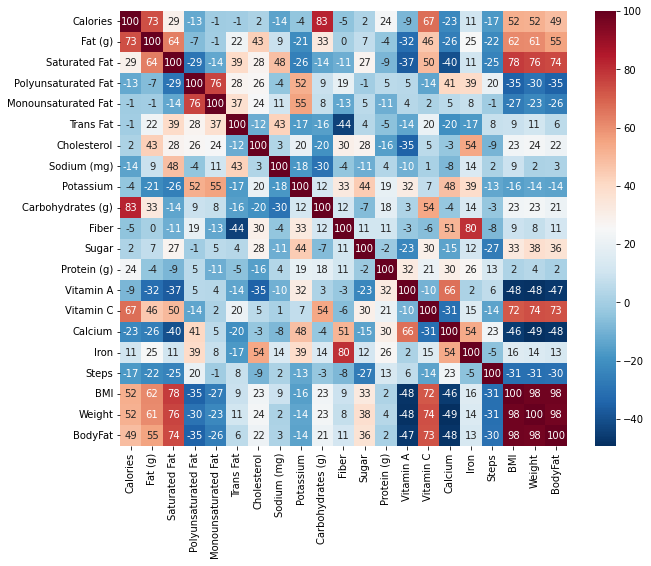

In [18]:
correlations = Nutrition_Exercise_Weight.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlations * 100,cmap='RdBu_r', annot=True, fmt='.0f')

plt.show()

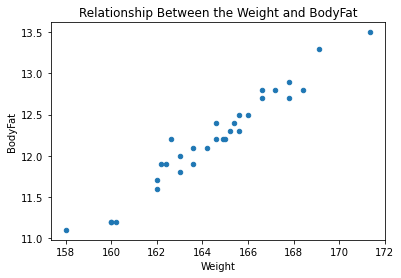

In [19]:
Nutrition_Exercise_Weight.plot.scatter(x='Weight',y='BodyFat',title='Relationship Between the Weight and BodyFat')
plt.show()

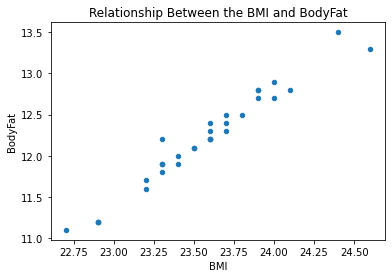

In [20]:
Nutrition_Exercise_Weight.plot.scatter(x='BMI',y='BodyFat',title='Relationship Between the BMI and BodyFat')
plt.show()

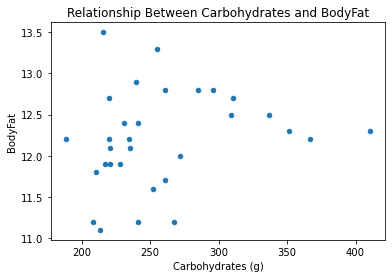

In [21]:
Nutrition_Exercise_Weight.plot.scatter(x='Carbohydrates (g)',y='BodyFat',title='Relationship Between Carbohydrates and BodyFat')
plt.show()

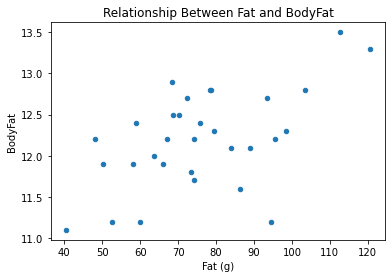

In [22]:
Nutrition_Exercise_Weight.plot.scatter(x='Fat (g)',y='BodyFat',title='Relationship Between Fat and BodyFat')
plt.show()

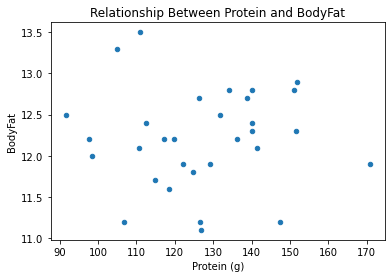

In [23]:
Nutrition_Exercise_Weight.plot.scatter(x='Protein (g)',y='BodyFat',title='Relationship Between Protein and BodyFat')
plt.show()

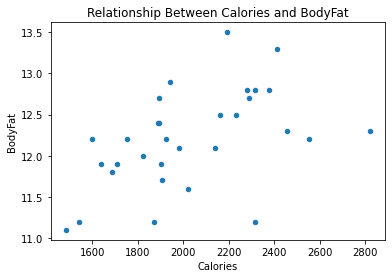

In [24]:
Nutrition_Exercise_Weight.plot.scatter(x='Calories',y='BodyFat',title='Relationship Between Calories and BodyFat')
plt.show()

# KETO vs. Intermittent Fasting

In [25]:
Exercise_Fast_Keto = pd.DataFrame({'Steps':[9732, 4689, 10913, 13865, 11628, 10125, 7692, 8269, 12695, 4094, 8719, 6547, 11249, 12036], 'Fasting Hours': [17.2, 18, 16, 18.5, 17.5, 20, 18, 14.5, 18, 16, 14, 19.5, 14, 17] ,'BMI':[22.6, 22.3, 22.4, 22.4, 22.4, 22, 22.4, 21.9, 21.8, 21.8, 21.9, 22.1, 22.2, 22.2], 'Weight':[157.8, 155.4, 156.4, 156.6, 156.6, 153.4, 156.6, 153.2, 152.4, 152.4, 153, 153.8, 154.8, 154.8], 'BodyFat':[10.9, 10.4, 10.6, 10.4, 10.4, 10, 10.4, 9.7, 9.5, 9.6, 9.7, 10.1, 10.1, 10.2]})

In [26]:
Intermittent_Keto = pd.read_csv('IntermittentKeto.csv')

In [27]:
Intermittent_Keto.head()

,Date,Meal,Time,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,...,Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Note
0,2022-05-10,Breakfast,2:15 PM,180.0,4.3,0.0,2.7,0.5,0.0,0.0,...,0.0,46.3,24.0,0.0,12.0,0.0,0.0,56.3,28.7,NaN
1,2022-05-10,Lunch,2:20 PM,135.0,3.3,0.0,2.0,0.4,0.0,0.0,...,0.0,34.8,18.0,0.0,9.0,0.0,0.0,42.3,21.5,NaN
2,2022-05-10,Dinner,NaN,307.0,8.4,0.6,2.0,0.5,0.0,0.0,...,328.4,35.3,9.5,13.3,22.4,0.0,9.9,40.8,5.5,NaN
3,2022-05-10,Dinner,11:50 PM,765.0,34.3,9.8,0.0,0.0,0.0,330.0,...,484.0,21.0,9.5,8.0,102.0,0.0,0.0,7.6,11.6,NaN
4,2022-05-10,Snacks,3:05 PM,195.0,10.5,0.8,0.0,0.0,0.0,0.0,...,105.0,24.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN


In [28]:
del Intermittent_Keto['Meal']
del Intermittent_Keto['Time']
del Intermittent_Keto['Note']

In [29]:
Intermittent_Keto.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
0,2022-05-10,180.0,4.3,0.0,2.7,0.5,0.0,0.0,326.7,0.0,46.3,24.0,0.0,12.0,0.0,0.0,56.3,28.7
1,2022-05-10,135.0,3.3,0.0,2.0,0.4,0.0,0.0,245.0,0.0,34.8,18.0,0.0,9.0,0.0,0.0,42.3,21.5
2,2022-05-10,307.0,8.4,0.6,2.0,0.5,0.0,0.0,144.7,328.4,35.3,9.5,13.3,22.4,0.0,9.9,40.8,5.5
3,2022-05-10,765.0,34.3,9.8,0.0,0.0,0.0,330.0,395.0,484.0,21.0,9.5,8.0,102.0,0.0,0.0,7.6,11.6
4,2022-05-10,195.0,10.5,0.8,0.0,0.0,0.0,0.0,97.5,105.0,24.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0


In [30]:
Intermittent_Keto.groupby('Date', as_index=False).sum()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
0,2022-05-10,1582.0,60.8,11.2,6.7,1.4,0.0,330.0,1238.9,977.4,161.4,64.0,21.3,148.4,0.0,9.9,147.0,67.3
1,2022-05-11,1477.6,56.9,9.4,5.2,1.1,0.0,246.7,1624.5,1416.5,150.3,49.1,40.7,124.4,0.0,9.9,119.9,49.0
2,2022-05-12,1687.6,50.0,22.7,2.7,0.5,0.0,250.0,1289.7,1228.1,227.2,37.9,81.5,126.0,60.0,37.5,84.5,79.4
3,2022-05-13,1732.1,53.3,16.6,4.1,0.9,0.0,400.0,2917.2,1157.4,175.4,59.3,30.3,184.1,56.0,83.9,108.3,73.1
4,2022-05-14,1400.1,50.6,17.5,2.1,0.5,0.0,443.8,696.4,1424.8,51.4,13.7,20.5,192.2,265.9,25.8,96.9,76.4
5,2022-05-15,1773.3,63.0,15.2,7.2,13.5,0.0,310.0,1041.4,1212.2,181.9,42.0,30.3,160.7,0.1,9.9,105.2,101.5
6,2022-05-16,978.8,22.6,6.9,3.5,3.1,0.0,369.5,573.2,2239.6,37.9,8.9,18.8,163.2,4.5,9.6,43.5,21.0
7,2022-05-17,1016.3,17.6,4.9,2.0,0.5,0.0,315.0,581.5,2219.0,42.6,11.6,18.1,174.3,0.0,6.6,40.2,16.1
8,2022-05-18,1317.2,36.1,11.2,2.0,0.5,0.0,481.3,726.4,2164.0,38.5,8.8,15.3,216.8,3.3,13.1,43.5,42.7
9,2022-05-19,1021.4,32.5,7.4,6.7,5.6,0.3,427.7,698.9,2279.1,18.5,4.2,4.0,194.2,4.6,24.8,100.7,28.2


In [31]:
Intermittent_Keto.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),Fiber,Sugar,Protein (g),Vitamin A,Vitamin C,Calcium,Iron
0,2022-05-10,180.0,4.3,0.0,2.7,0.5,0.0,0.0,326.7,0.0,46.3,24.0,0.0,12.0,0.0,0.0,56.3,28.7
1,2022-05-10,135.0,3.3,0.0,2.0,0.4,0.0,0.0,245.0,0.0,34.8,18.0,0.0,9.0,0.0,0.0,42.3,21.5
2,2022-05-10,307.0,8.4,0.6,2.0,0.5,0.0,0.0,144.7,328.4,35.3,9.5,13.3,22.4,0.0,9.9,40.8,5.5
3,2022-05-10,765.0,34.3,9.8,0.0,0.0,0.0,330.0,395.0,484.0,21.0,9.5,8.0,102.0,0.0,0.0,7.6,11.6
4,2022-05-10,195.0,10.5,0.8,0.0,0.0,0.0,0.0,97.5,105.0,24.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0


In [32]:
Exercise_Fast_Keto['Date1'] = Intermittent_Keto['Date']
Exercise_Fast_Keto

,Steps,Fasting Hours,BMI,Weight,BodyFat,Date1
0,9732,17.2,22.6,157.8,10.9,2022-05-10
1,4689,18.0,22.3,155.4,10.4,2022-05-10
2,10913,16.0,22.4,156.4,10.6,2022-05-10
3,13865,18.5,22.4,156.6,10.4,2022-05-10
4,11628,17.5,22.4,156.6,10.4,2022-05-10
5,10125,20.0,22.0,153.4,10.0,2022-05-10
6,7692,18.0,22.4,156.6,10.4,2022-05-11
7,8269,14.5,21.9,153.2,9.7,2022-05-11
8,12695,18.0,21.8,152.4,9.5,2022-05-11
9,4094,16.0,21.8,152.4,9.6,2022-05-11


In [33]:
Exercise_Intermittent_Keto = pd.concat((Intermittent_Keto, Exercise_Fast_Keto), axis=1)

In [34]:
Exercise_Intermittent_Keto.head()

,Date,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,...,Vitamin A,Vitamin C,Calcium,Iron,Steps,Fasting Hours,BMI,Weight,BodyFat,Date1
0,2022-05-10,180.0,4.3,0.0,2.7,0.5,0.0,0.0,326.7,0.0,...,0.0,0.0,56.3,28.7,9732.0,17.2,22.6,157.8,10.9,2022-05-10
1,2022-05-10,135.0,3.3,0.0,2.0,0.4,0.0,0.0,245.0,0.0,...,0.0,0.0,42.3,21.5,4689.0,18.0,22.3,155.4,10.4,2022-05-10
2,2022-05-10,307.0,8.4,0.6,2.0,0.5,0.0,0.0,144.7,328.4,...,0.0,9.9,40.8,5.5,10913.0,16.0,22.4,156.4,10.6,2022-05-10
3,2022-05-10,765.0,34.3,9.8,0.0,0.0,0.0,330.0,395.0,484.0,...,0.0,0.0,7.6,11.6,13865.0,18.5,22.4,156.6,10.4,2022-05-10
4,2022-05-10,195.0,10.5,0.8,0.0,0.0,0.0,0.0,97.5,105.0,...,0.0,0.0,0.0,0.0,11628.0,17.5,22.4,156.6,10.4,2022-05-10


In [35]:
Exercise_Intermittent_Keto.groupby('Date').sum()

,Calories,Fat (g),Saturated Fat,Polyunsaturated Fat,Monounsaturated Fat,Trans Fat,Cholesterol,Sodium (mg),Potassium,Carbohydrates (g),...,Protein (g),Vitamin A,Vitamin C,Calcium,Iron,Steps,Fasting Hours,BMI,Weight,BodyFat
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-10,1582.0,60.8,11.2,6.7,1.4,0.0,330.0,1238.9,977.4,161.4,...,148.4,0.0,9.9,147.0,67.3,60952.0,107.2,134.1,936.2,62.7
2022-05-11,1477.6,56.9,9.4,5.2,1.1,0.0,246.7,1624.5,1416.5,150.3,...,124.4,0.0,9.9,119.9,49.0,71301.0,131.0,176.3,1231.0,79.3
2022-05-12,1687.6,50.0,22.7,2.7,0.5,0.0,250.0,1289.7,1228.1,227.2,...,126.0,60.0,37.5,84.5,79.4,0.0,0.0,0.0,0.0,0.0
2022-05-13,1732.1,53.3,16.6,4.1,0.9,0.0,400.0,2917.2,1157.4,175.4,...,184.1,56.0,83.9,108.3,73.1,0.0,0.0,0.0,0.0,0.0
2022-05-14,1400.1,50.6,17.5,2.1,0.5,0.0,443.8,696.4,1424.8,51.4,...,192.2,265.9,25.8,96.9,76.4,0.0,0.0,0.0,0.0,0.0
2022-05-15,1773.3,63.0,15.2,7.2,13.5,0.0,310.0,1041.4,1212.2,181.9,...,160.7,0.1,9.9,105.2,101.5,0.0,0.0,0.0,0.0,0.0
2022-05-16,978.8,22.6,6.9,3.5,3.1,0.0,369.5,573.2,2239.6,37.9,...,163.2,4.5,9.6,43.5,21.0,0.0,0.0,0.0,0.0,0.0
2022-05-17,1016.3,17.6,4.9,2.0,0.5,0.0,315.0,581.5,2219.0,42.6,...,174.3,0.0,6.6,40.2,16.1,0.0,0.0,0.0,0.0,0.0
2022-05-18,1317.2,36.1,11.2,2.0,0.5,0.0,481.3,726.4,2164.0,38.5,...,216.8,3.3,13.1,43.5,42.7,0.0,0.0,0.0,0.0,0.0


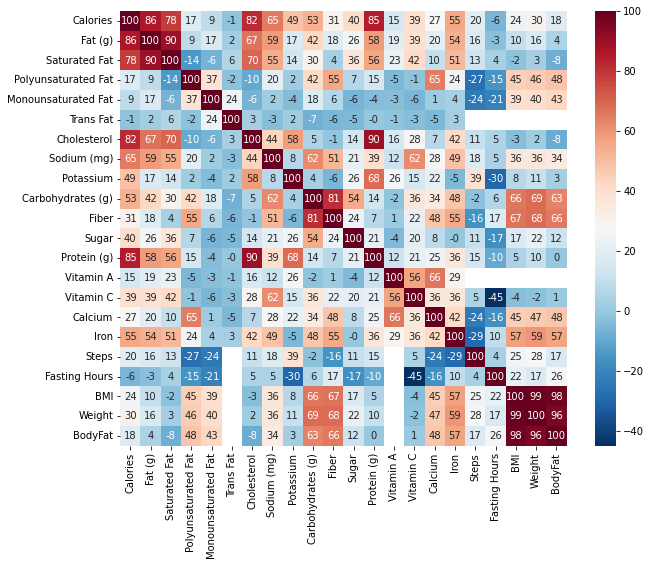

In [36]:
correlations = Exercise_Intermittent_Keto.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlations * 100,cmap='RdBu_r', annot=True, fmt='.0f')

plt.show()